Fuente: https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html

**Color Quantization** es una técnica utilizada para reducir el número de colores en una imagen

El algoritmo K Means se puede utilizar para comprimir imágenes, reduciendo el número total de colores que representa la imagen, así se necesitarán menos bits para representar la imagen.

Vamos a coger una imagen que con 96.615 y la vamos a representar con 64.


In [10]:
# Authors: Robert Layton <robertlayton@gmail.com>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 64

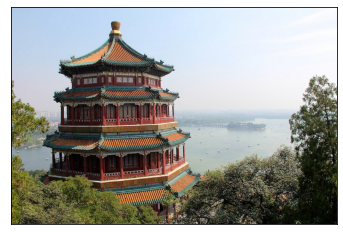

In [11]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [12]:
# (altura, anchura, canales de colores)
# en este caso los canales de colores son 3: RGB
china.shape

(427, 640, 3)

In [13]:
china.max(), china.min()

(255, 0)

In [14]:
# Los algoritmos funcionan mejor si los datos se normalizanentre 0 y 1
china = np.array(china, dtype=np.float64) / 255
china.max(), china.min()

(1.0, 0.0)

In [15]:

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")

image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

Fitting model on a small sub-sample of the data


In [16]:
# Get labels for all points
print("Predicting color indices on the full image (k-means)")

labels = kmeans.predict(image_array)



codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")

labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)



def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

Predicting color indices on the full image (k-means)
Predicting color indices on the full image (random)


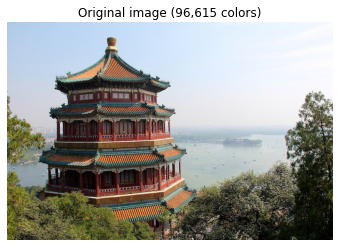

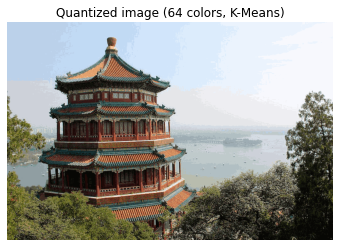

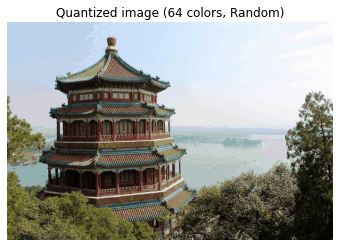

In [17]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()